#### R<sub>N</sub> = (R<sub>SD</sub> - R<sub>SU</sub>) + (R<sub>LD</sub> - R<sub>LU</sub>)

In [8]:
import os
import numpy
import matplotlib.pyplot as plt

In [9]:
def read_site_csv(csv_filename):
    csv_data = numpy.genfromtxt(csv_filename, delimiter=',', dtype=str)
    csv_v = csv_data[:, 1]
    csv_v = csv_v.astype(float)
    return csv_data[:, 0], csv_v


def calculate_r_net(r_sd, r_su, r_ld, r_lu):
    r_net = (r_sd - r_su) + (r_ld - r_lu)
    return r_net

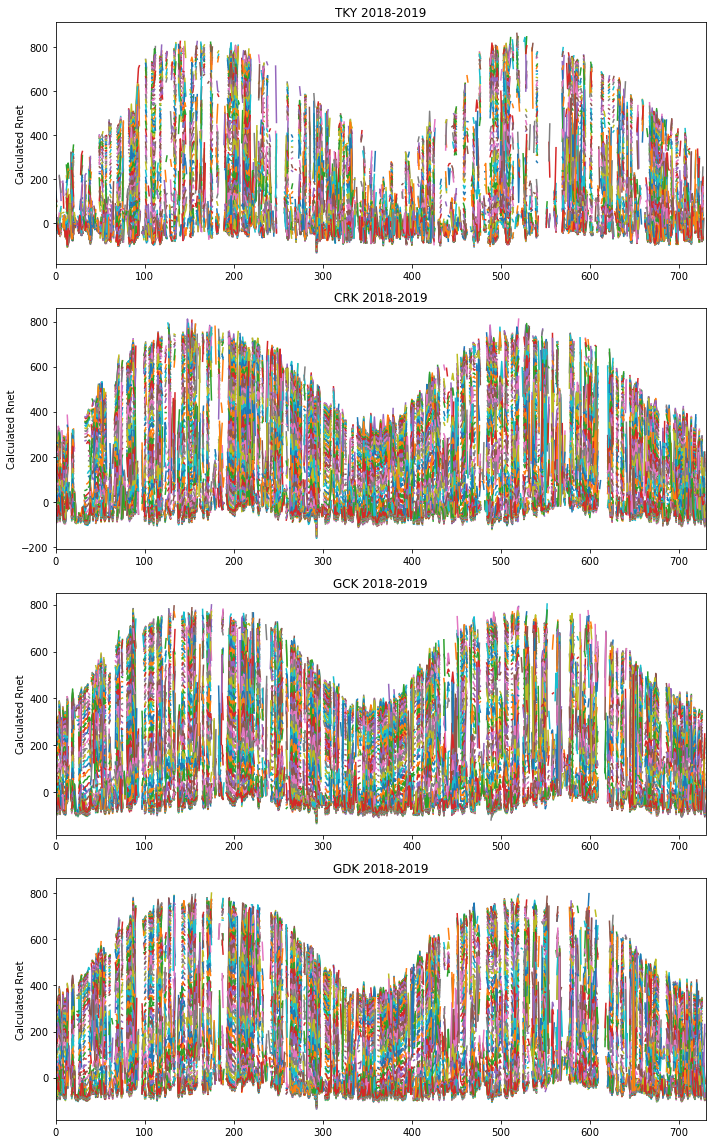

In [10]:
OUTPUT_FOLDER = '/disk2/workspace/20231125'

site_names = ['TKY', 'CRK', 'GCK', 'GDK']

fig, axes = plt.subplots(len(site_names), 1, figsize=(10, 4 * len(site_names)))    

for i, site_name in enumerate(site_names):
    Rsd_SITE_CSV = os.path.join(OUTPUT_FOLDER, site_name + '_Rsd.csv')
    r_sd_timelist, r_sd_10min = read_site_csv(Rsd_SITE_CSV)
    Rsu_SITE_CSV = os.path.join(OUTPUT_FOLDER, site_name + '_Rsu.csv')
    r_su_timelist, r_su_10min = read_site_csv(Rsu_SITE_CSV)
    Rld_SITE_CSV = os.path.join(OUTPUT_FOLDER, site_name + '_Rld.csv')
    r_ld_timelist, r_ld_10min = read_site_csv(Rld_SITE_CSV)
    Rlu_SITE_CSV = os.path.join(OUTPUT_FOLDER, site_name + '_Rlu.csv')
    r_lu_timelist, r_lu_10min = read_site_csv(Rlu_SITE_CSV)
    
    r_net_10min = calculate_r_net(r_sd_10min, r_su_10min, r_ld_10min, r_lu_10min)
    
    r_net_record = r_net_10min.astype(str)
    r_net_csv_ = numpy.column_stack((r_sd_timelist, r_net_record))
    numpy.savetxt(os.path.join(OUTPUT_FOLDER, site_name+'_Rnet'+'.csv'), r_net_csv_, delimiter=",", fmt='%s')

    data_day = r_net_10min.reshape(365 * 2, 24 * 6)
    
    axes[i].plot(numpy.arange(365 * 2), data_day)
    axes[i].set_title(site_name + ' 2018-2019')
    axes[i].set_xlim(0, 365 * 2)
    axes[i].set_ylabel('Calculated Rnet')

plt.tight_layout()
plt.show()